In [1]:
#importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


In [ ]:
#lendo o arquivo BRA.csv
#O arquivo utilizado foi baixado do site www.football-data.co.uk, que agrega informações de diversos campeonatos
#ao redor do mundo.

data=pd.read_csv('/content/drive/MyDrive/Trabalho_TD/machine_learnig-master/BRA.csv',delimiter=';')

#Verificando as 5 primeiras linhas do arquivo a ser utilizado
display(data.head())

#Notes for football data

#Country = país do campeonato
#League = nome da liga
#game_id = id do jogo
#Season = temporada
#date = data do jogo
#Time = hora do jogo
#Home = Time da casa
#home_id = id do time da casa
#Away = time visitante
#Away_id =  id do time visitante
#HG = Gols do time da casa
#AG = Gols do time visitante
#Res = Resultado do jogo (D=Draw, H=Home win, A=Away win)
#PH = probablidade vitória time da casa provida pela Pinacle (casa de aposta inglesa)
#PD = probablidade empate provida pela Pinacle (casa de aposta inglesa)
#PA = probablidade vitória time visitante provida pela Pinacle (casa de aposta inglesa)
#MaxH = probablidade vitória time da casa provida pela OddsPortal (casa de aposta inglesa)
#MaxD = probablidade empate provida pela OddsPortal (casa de aposta inglesa)
#MaxA = probablidade vitória time visitante provida pela OddsPortal (casa de aposta ingles
#AvgH = probablidade média de vitória em casa provida pela OddsPortal (casa de aposta inglesa)
#AvgD = probablidade média de empate provida pela OddsPortal (casa de aposta inglesa)
#AvgA = probablidade média de vitória pelo time visitante provida pela OddsPortal (casa de aposta inglesa)


,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,2.0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,2.0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,0.0,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,0.0,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,1.0,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
# Usar LabelEncoder para gerar IDs numéricos dos times
label_encoder = LabelEncoder()
data['home_id'] = label_encoder.fit_transform(data['Home'])
data['away_id'] = label_encoder.fit_transform(data['Home'])
data['game_id'] = data.index
display(data.head())


,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,home_id,away_id,game_id
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,2.0,...,5.25,1.76,3.87,5.31,1.69,3.50,4.90,27,27,0
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,2.0,...,2.68,2.83,3.42,2.70,2.59,3.23,2.58,34,34,1
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,0.0,...,6.72,1.67,4.05,7.22,1.59,3.67,5.64,17,17,2
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,0.0,...,3.15,2.49,3.39,3.15,2.35,3.26,2.84,7,7,3
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,1.0,...,4.41,1.96,3.53,4.41,1.89,3.33,3.89,12,12,4


In [ ]:
# Remover linhas com valores NaN ou inf
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Converter para int
data['Res'] = data['Res'].astype(int)

In [ ]:
data.dtypes


Country     object
League      object
Season       int64
Date        object
Time        object
Home        object
Away        object
HG         float64
AG         float64
Res          int64
PH         float64
PD         float64
PA         float64
MaxH       float64
MaxD       float64
MaxA       float64
AvgH       float64
AvgD       float64
AvgA       float64
home_id      int64
away_id      int64
game_id      int64
dtype: object

In [ ]:
#Explorando os dados
#Base de dados de dos campeonatos de 2012 a 2017

matches = data.shape[0]

features = data.shape[1] -1 #Retirando a coluna Resultado

home_win = len(data[data.Res== 0])
away_win = len(data[data.Res== 1])
draw = len(data[data.Res== 2])
val=[home_win,away_win,draw]

win_rate = (float(home_win)/(matches)) *100

print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos ganhos em casa: ', home_win)
print ('Total de jogos ganhos pelo visitante: ', away_win)
print ('Total de jogos empatados: ', draw)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))

#Podemos notar que o "fator casa" é importante , sendo que em quase 50% do jogos são ganhos pelo time da casa.

Total de jogos:  4634
Total de colunas:  21
Total de jogos ganhos em casa:  2243
Total de jogos ganhos pelo visitante:  1142
Total de jogos empatados:  1249
Percentual de jogos ganhos em casa: 48.40%


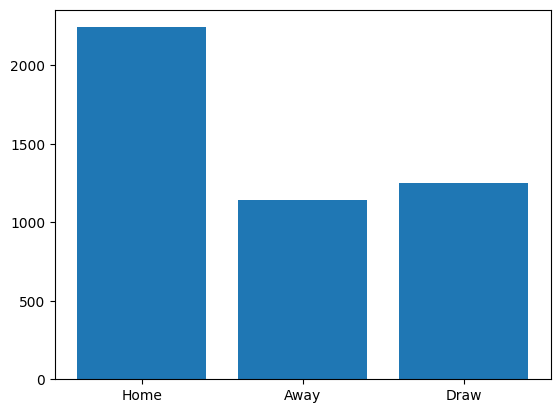

In [ ]:
#Visualizando os dados

x = np.arange(3)
plt.bar(x, val)
plt.xticks(x, ('Home', 'Away', 'Draw'))
plt.show()


In [ ]:
#Preparando os dados


#Deixar somente as variáveis numericas
num_data = data.drop(['Country','League','Season','Date','Time','Home','Away'], axis=1)

display(num_data.head())


,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,home_id,away_id,game_id
0,1.0,1.0,2,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,27,27,0
1,1.0,1.0,2,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,34,34,1
2,2.0,1.0,0,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,17,17,2
3,4.0,2.0,0,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,7,7,3
4,0.0,1.0,1,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,12,12,4


In [ ]:
#separa as features
features = num_data.drop(['Res'], axis=1)


#separa as labels
labels = num_data['Res']

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())

Features
    HG   AG    PH    PD    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA  home_id  \
0  1.0  1.0  1.75  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90       27   
1  1.0  1.0  2.83  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58       34   
2  2.0  1.0  1.60  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64       17   
3  4.0  2.0  2.49  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84        7   
4  0.0  1.0  1.96  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89       12   

   away_id  game_id  
0       27        0  
1       34        1  
2       17        2  
3        7        3  
4       12        4  
Labels
0    2
1    2
2    0
3    0
4    1
Name: Res, dtype: int64


In [ ]:
#Escoolhendo as melhores features com Kbest

features_list = ('HG','AG','PH','PD','PA','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'AG': 1529.9850233251893, 'PH': 1499.810378571405, 'PD': 200.45327341194823, 'AvgD': 195.89357655234525, 'MaxD': 177.89786069629398, 'MaxH': 176.17273518485192, 'AvgH': 173.59691523239331, 'MaxA': 91.80776569529826, 'AvgA': 90.2127229045109, 'PA': 88.93032311046056}


In [ ]:
#separa as features com base nas melhores features para treinamento
features = num_data.drop(['Res','game_id','home_id','away_id', 'PH', 'PD', 'AG'], axis=1)


#separa as labels para treinamento
labels = num_data['Res']

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())

Features
    HG    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA
0  1.0  5.25  1.76  3.87  5.31  1.69  3.50  4.90
1  1.0  2.68  2.83  3.42  2.70  2.59  3.23  2.58
2  2.0  6.72  1.67  4.05  7.22  1.59  3.67  5.64
3  4.0  3.15  2.49  3.39  3.15  2.35  3.26  2.84
4  0.0  4.41  1.96  3.53  4.41  1.89  3.33  3.89
Labels
0    2
1    2
2    0
3    0
4    1
Name: Res, dtype: int64


In [ ]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print ('Features: ',features_scale.shape)
print (features_scale)

Features:  (4634, 8)
[[0.14285714 0.14421386 0.02400573 ... 0.03235908 0.11913357 0.14746363]
 [0.14285714 0.05381639 0.06234325 ... 0.07933194 0.0866426  0.0562328 ]
 [0.28571429 0.1959198  0.02078108 ... 0.02713987 0.13959085 0.17656311]
 ...
 [0.         0.07984523 0.05410247 ... 0.06837161 0.05776173 0.08375934]
 [0.14285714 0.10446711 0.03439627 ... 0.04070981 0.12876053 0.11875737]
 [0.28571429 0.23320436 0.01361519 ... 0.01931106 0.21419976 0.24537947]]


In [ ]:
#Separa em treinamento e teste
#Separação manual para manter a ordem cronológica, uma vez que temos informação temporal.


#Treino linhas [:3041]
#Teste linhas [3041:4181]
#previsão linhas [4182:4636]


X_train = features_scale[:3041]
X_test = features_scale[3041:4181]
y_train = labels[:3041]
y_test = labels[3041:4181]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))


3041 3041
1140 1140


In [ ]:
#Treinando e testando os modelos
#print ('LogisticRegression')


clf_LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
clf_LR.fit(X_train, y_train)
pred= clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred,average = 'micro')
print ('Acurácia dos testes:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

Acurácia dos testes:0.6114035087719298
F1 Score:0.6114035087719298


In [ ]:
#Testando LogistRegression hyper parameters

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train,y_train)
clf_LR_hp = search.best_estimator_
pred= clf_LR.predict(X_test)
lg_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'macro')

print ('Acurácia dos testes LR:{}'.format(lg_acc))
print ('F1 Score dos testes:{}'.format(f1) )

print ('Parâmetros utilizados: C=100, max_iter=1000 ')

Acurácia dos testes LR:0.6105263157894737
F1 Score dos testes:0.5648570241811387
Parâmetros utilizados: C=100, max_iter=1000 


In [ ]:
#Executando a previsao

previsao=features_scale[4181:]

game_id_full=data['game_id']
game_id=game_id_full[4181:]

res_full=data['Res']
res=res_full[4181:]


pred=clf_LR.predict(previsao)

df=pd.DataFrame({'real': res, 'previsao':pred, 'game_id':game_id})


print(df)

      real  previsao  game_id
4182     0         0     4182
4183     0         0     4183
4184     0         0     4184
4185     2         2     4185
4186     1         0     4186
...    ...       ...      ...
4630     0         0     4630
4631     0         0     4631
4632     2         1     4632
4633     0         2     4633
4634     0         0     4634

[453 rows x 3 columns]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(res, pred, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.5813816553847388
recall: 0.5773756814553779
fscore: 0.577874390974435
support: None


In [ ]:
dt_acc = accuracy_score(res, pred)
f1=f1_score(res,pred, average='macro')
#print ('Acurácia dos testes SVC:{}'.format(svc_acc))
print ('Acurácia de previsão final:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )

Acurácia de previsão final:0.6203090507726269
F1 Score:0.577874390974435


<Axes: xlabel='PREVISÃO', ylabel='REAL'>

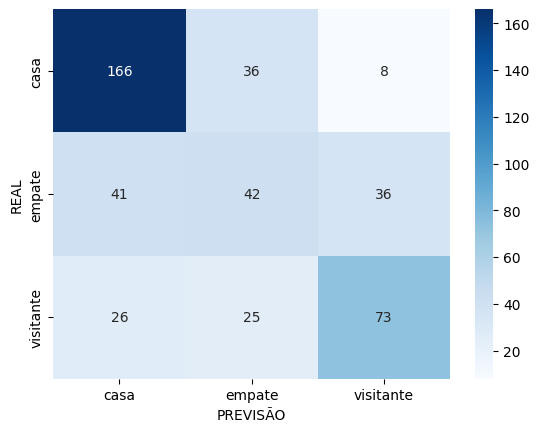

In [ ]:
#confusion Matrix

df=pd.DataFrame(df,columns=['real','previsao'])


mapping = {0: 'casa', 1: 'visitante', 2: 'empate'}

# Usar o método replace para substituir os números pelas palavras
df['real'] = df['real'].replace(mapping)
df['previsao'] = df['previsao'].replace(mapping)

cf_matrix=pd.crosstab(df['real'], df['previsao'], rownames=['REAL'] , colnames=['PREVISÃO'])

##sns.heatmap(cf_matrix, annot=True, cmap='Blues')

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [ ]:
# Calcular a porcentagem de acerto para cada categoria
accuracy_home = cf_matrix.loc['casa', 'casa'] / cf_matrix.loc['casa'].sum() * 100
accuracy_visitor = cf_matrix.loc['visitante', 'visitante'] / cf_matrix.loc['visitante'].sum() * 100
accuracy_draw = cf_matrix.loc['empate', 'empate'] / cf_matrix.loc['empate'].sum() * 100

# Imprimir as porcentagens de acerto
#print("\nPorcentagem de acerto:")
print(f"Vitória do time da Casa: {accuracy_home:.2f}%")
print(f"Vitória do time Visitante: {accuracy_visitor:.2f}%")
print(f"Empate: {accuracy_draw:.2f}%")

Vitória do time da Casa: 79.05%
Vitória do time Visitante: 58.87%
Empate: 35.29%
